In [1]:
%cd ..


c:\Repositories\omrtorch


### Preamble

In [2]:
from PIL import Image
import torch
from torchvision.utils import draw_bounding_boxes

from omrengine import OMREngine
import os
import cv2 as cv
import numpy as np
from PIL import Image

from omrmodules.semantics.SystemObjects import SongFactory, denormalize_bboxes
from omrmodules.datasets.MuscimaMeasures import visualize_bboxes

def visualize(image, boxes):
    viz_image = torch.asarray(image)
    viz_image = (viz_image*255).type(torch.ByteTensor)
    viz_boxes = denormalize_bboxes(np.asarray(boxes), viz_image)
    viz_boxes = torch.asarray(viz_boxes)

    viz_im_with_bounding_boxes = draw_bounding_boxes(
        viz_image, viz_boxes, width=5, colors="red")

    return Image.fromarray(np.moveaxis(viz_im_with_bounding_boxes.numpy(), 0, -1))

def ppoToImage(x): return (
    np.repeat(np.moveaxis(x, 0, 2), 3, 2) * 255).astype(np.uint8)
def ShowPreProcessedImage(x): return Image.fromarray(ppoToImage(x))

In [3]:
# Initialize inference engine
omrengine = OMREngine()

In [12]:
#IMAGE = os.path.join("samples", "demo_score.png")
IMAGE = os.path.join("samples", "20220425_184413.jpg")
sample_image = cv.imread(IMAGE)
sample_image = OMREngine.preprocess(sample_image)


### Preprocessed score

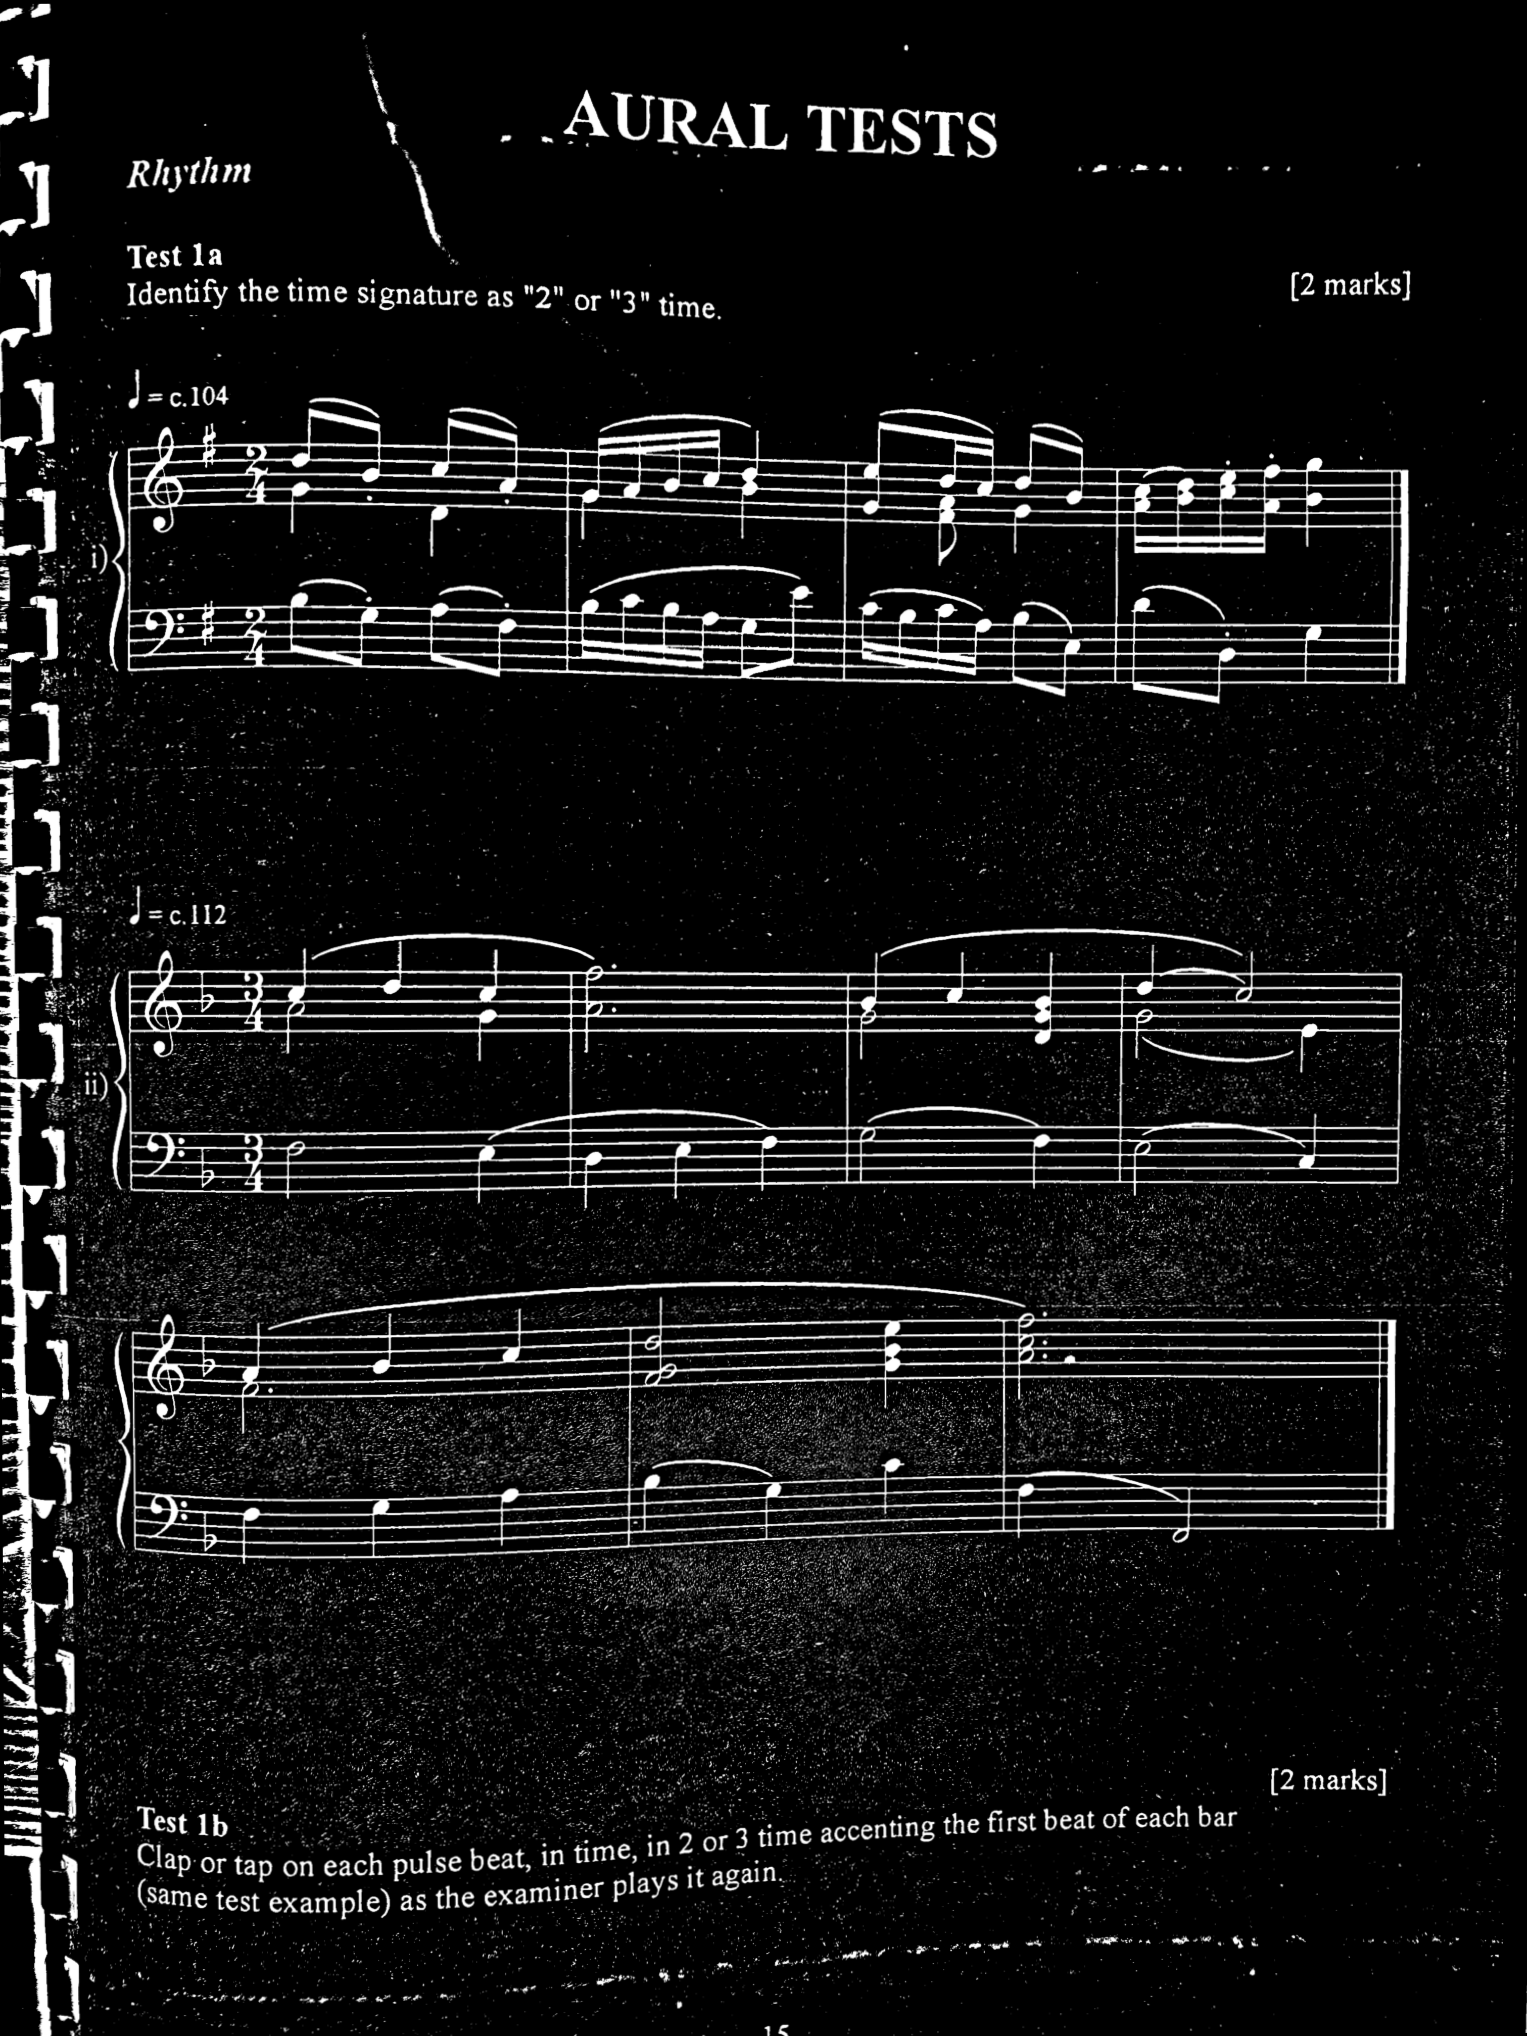

In [13]:
ShowPreProcessedImage(sample_image)


### Inference

In [14]:
measure_dict, object_dict = omrengine(sample_image)


### Visualize Detections

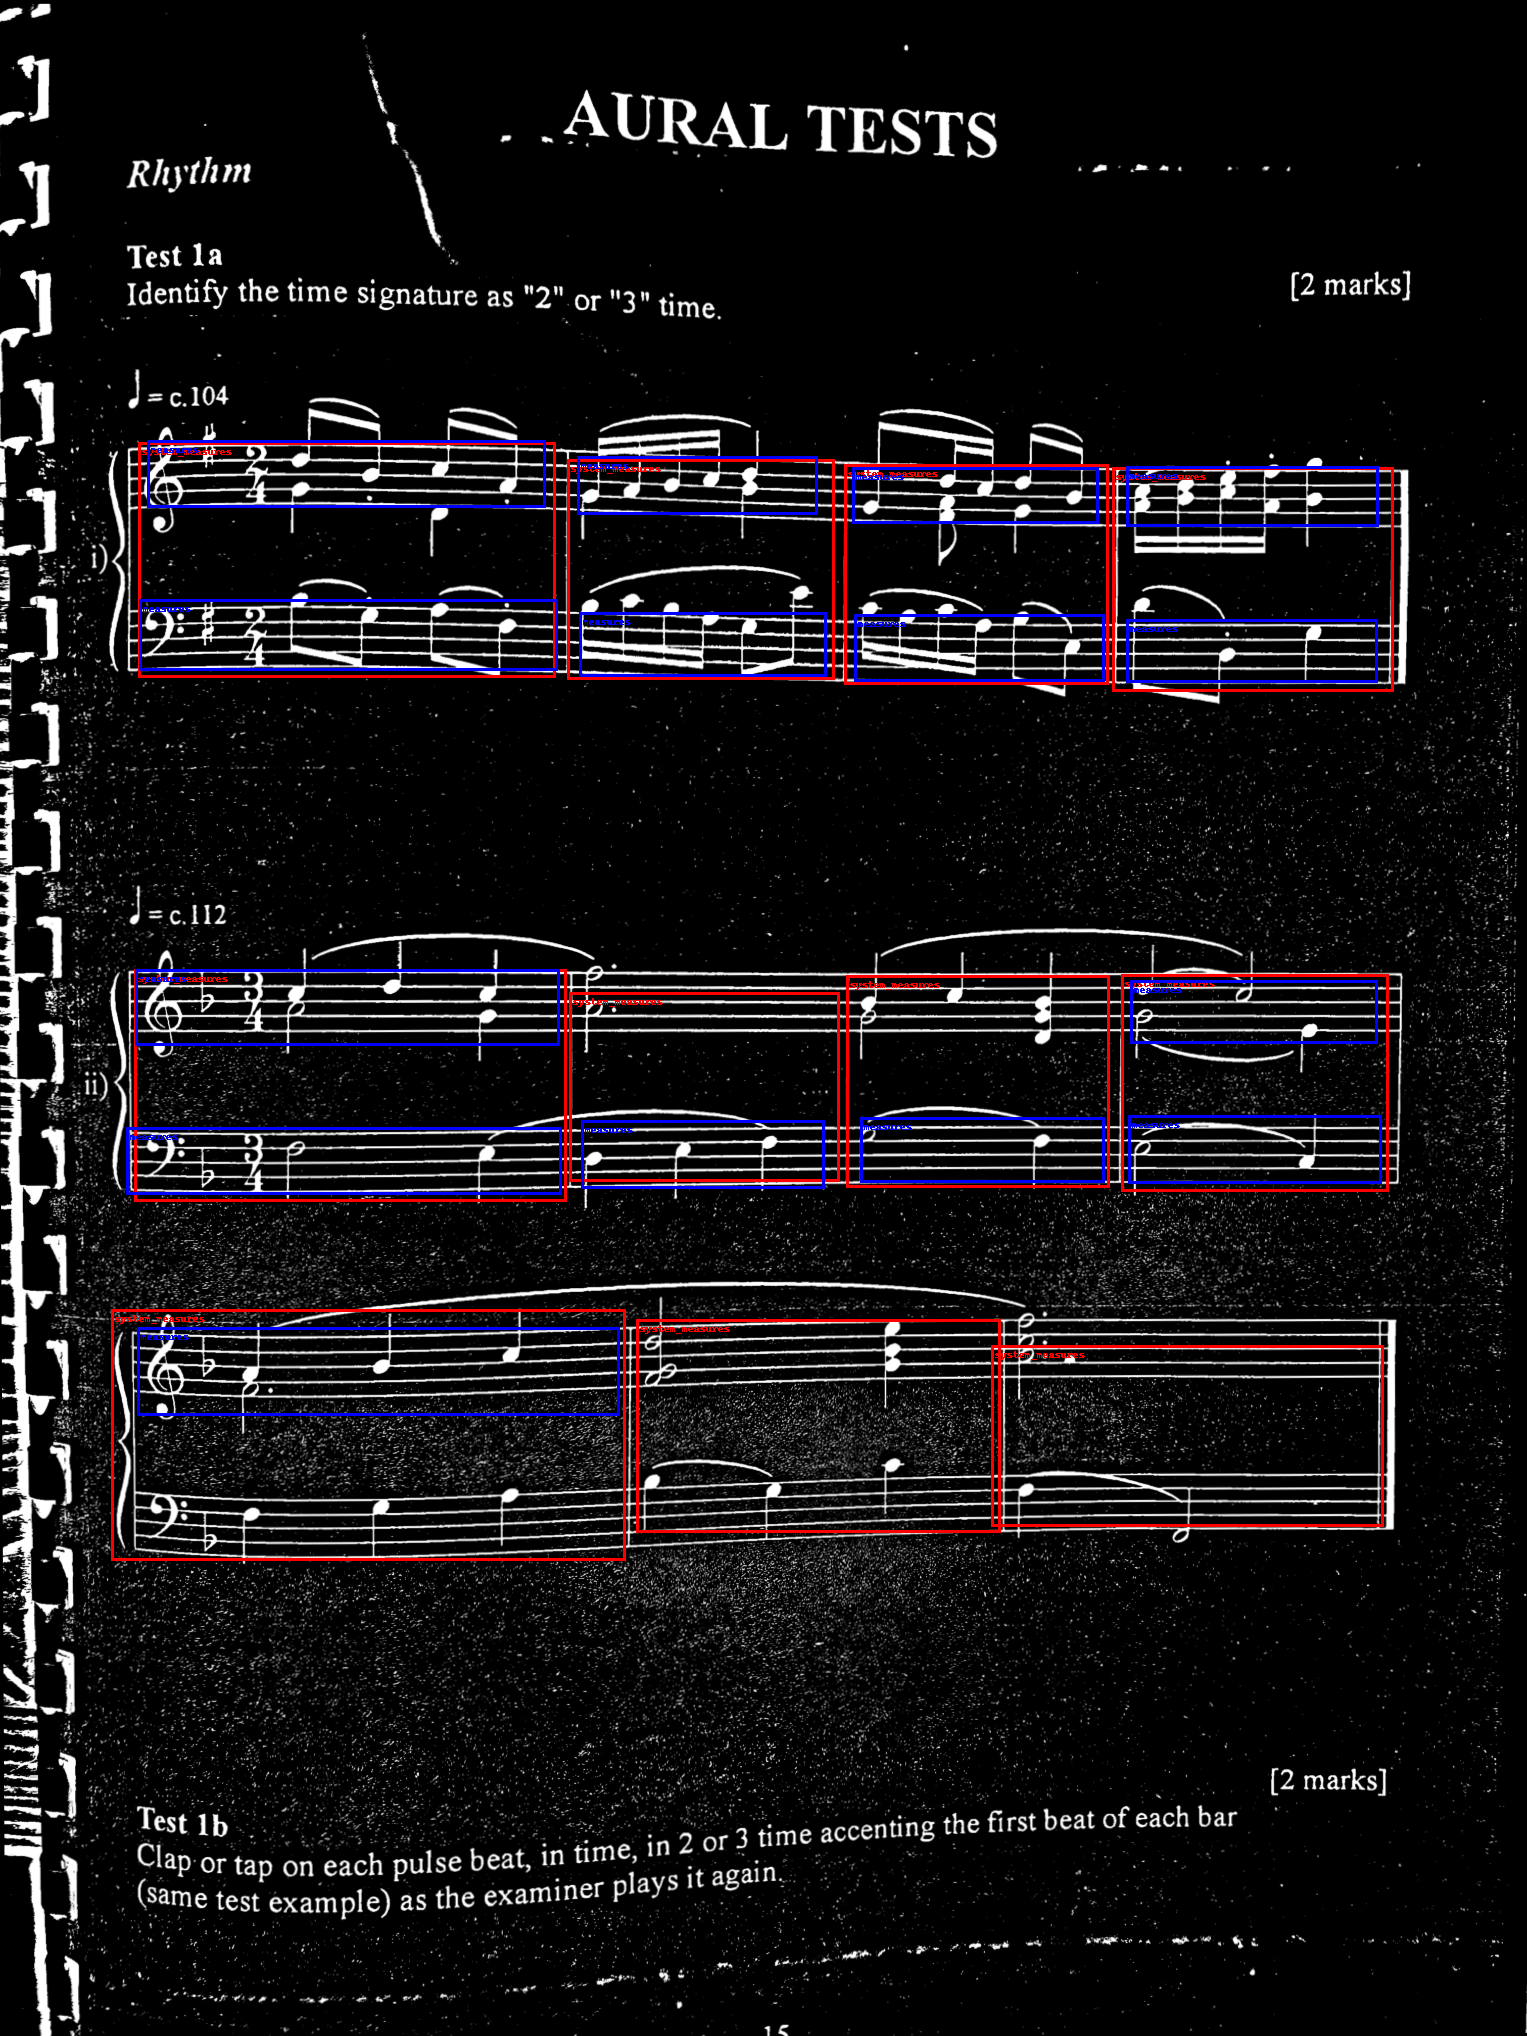

In [15]:
visualize_bboxes(sample_image, measure_dict, threshold=0.75)

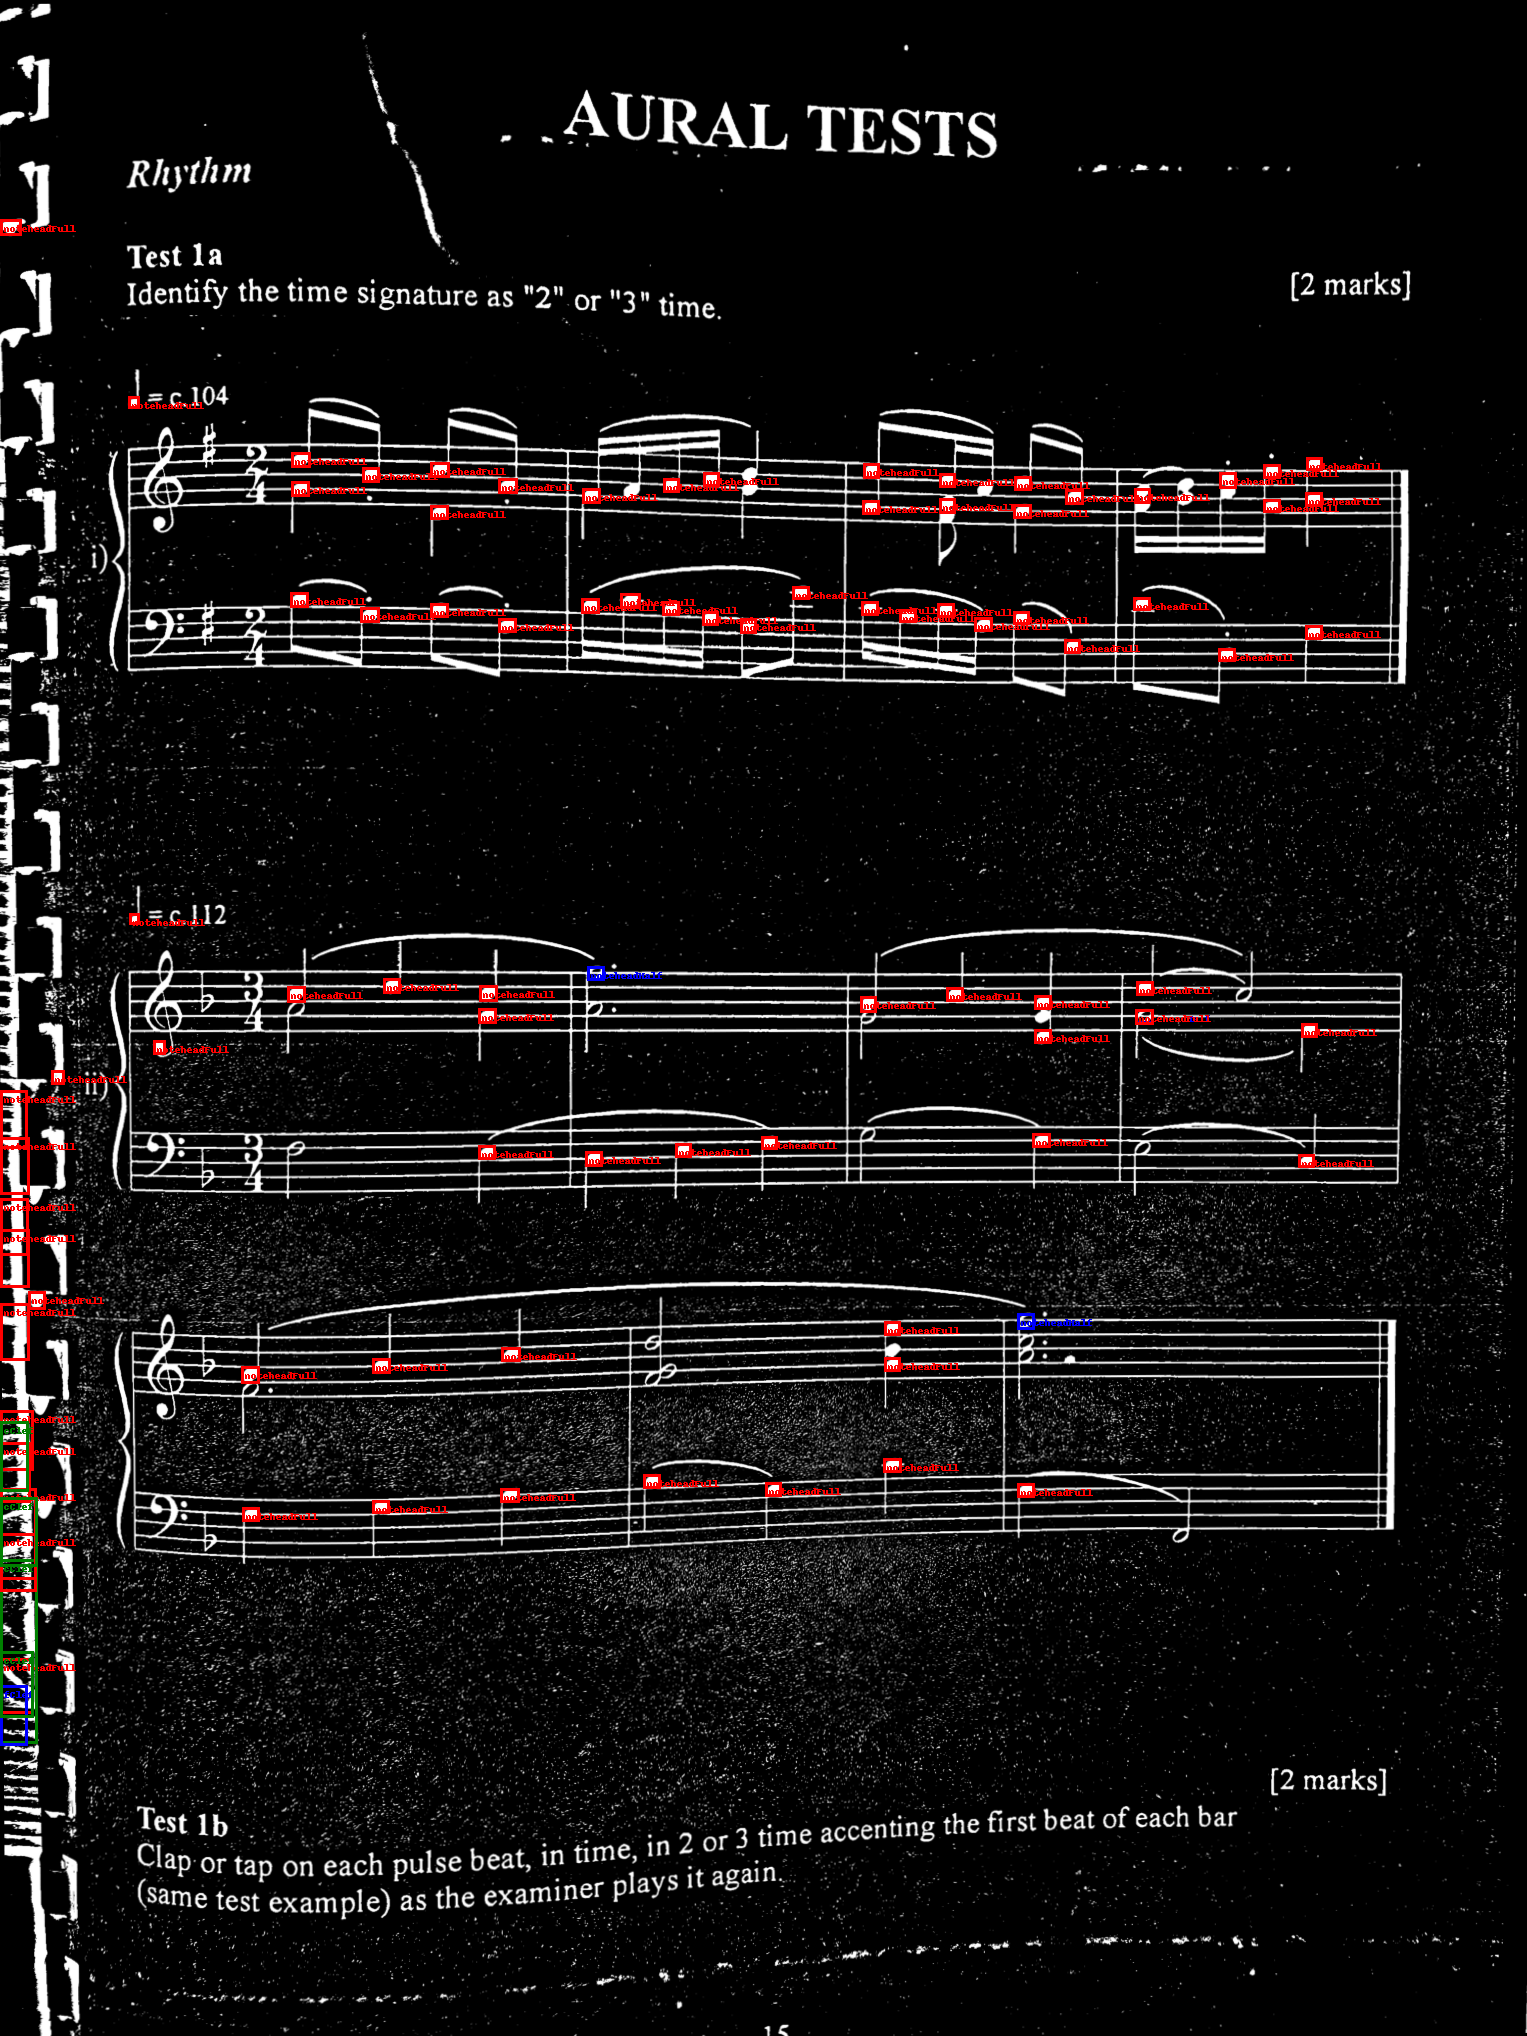

In [20]:
from omrmodules.datasets.MuscimaObjects import __pitch_objects__
label_dict = __pitch_objects__.copy()
label_dict.insert(0, "__background__")
visualize_bboxes(sample_image, object_dict, label_dict, threshold=0.1)


In [52]:
from importlib import reload
import omrmodules.semantics.SystemObjects as SystemObjects
reload(SystemObjects)

<module 'omrmodules.semantics.SystemObjects' from 'c:\\Repositories\\omrtorch\\omrmodules\\semantics\\SystemObjects.py'>

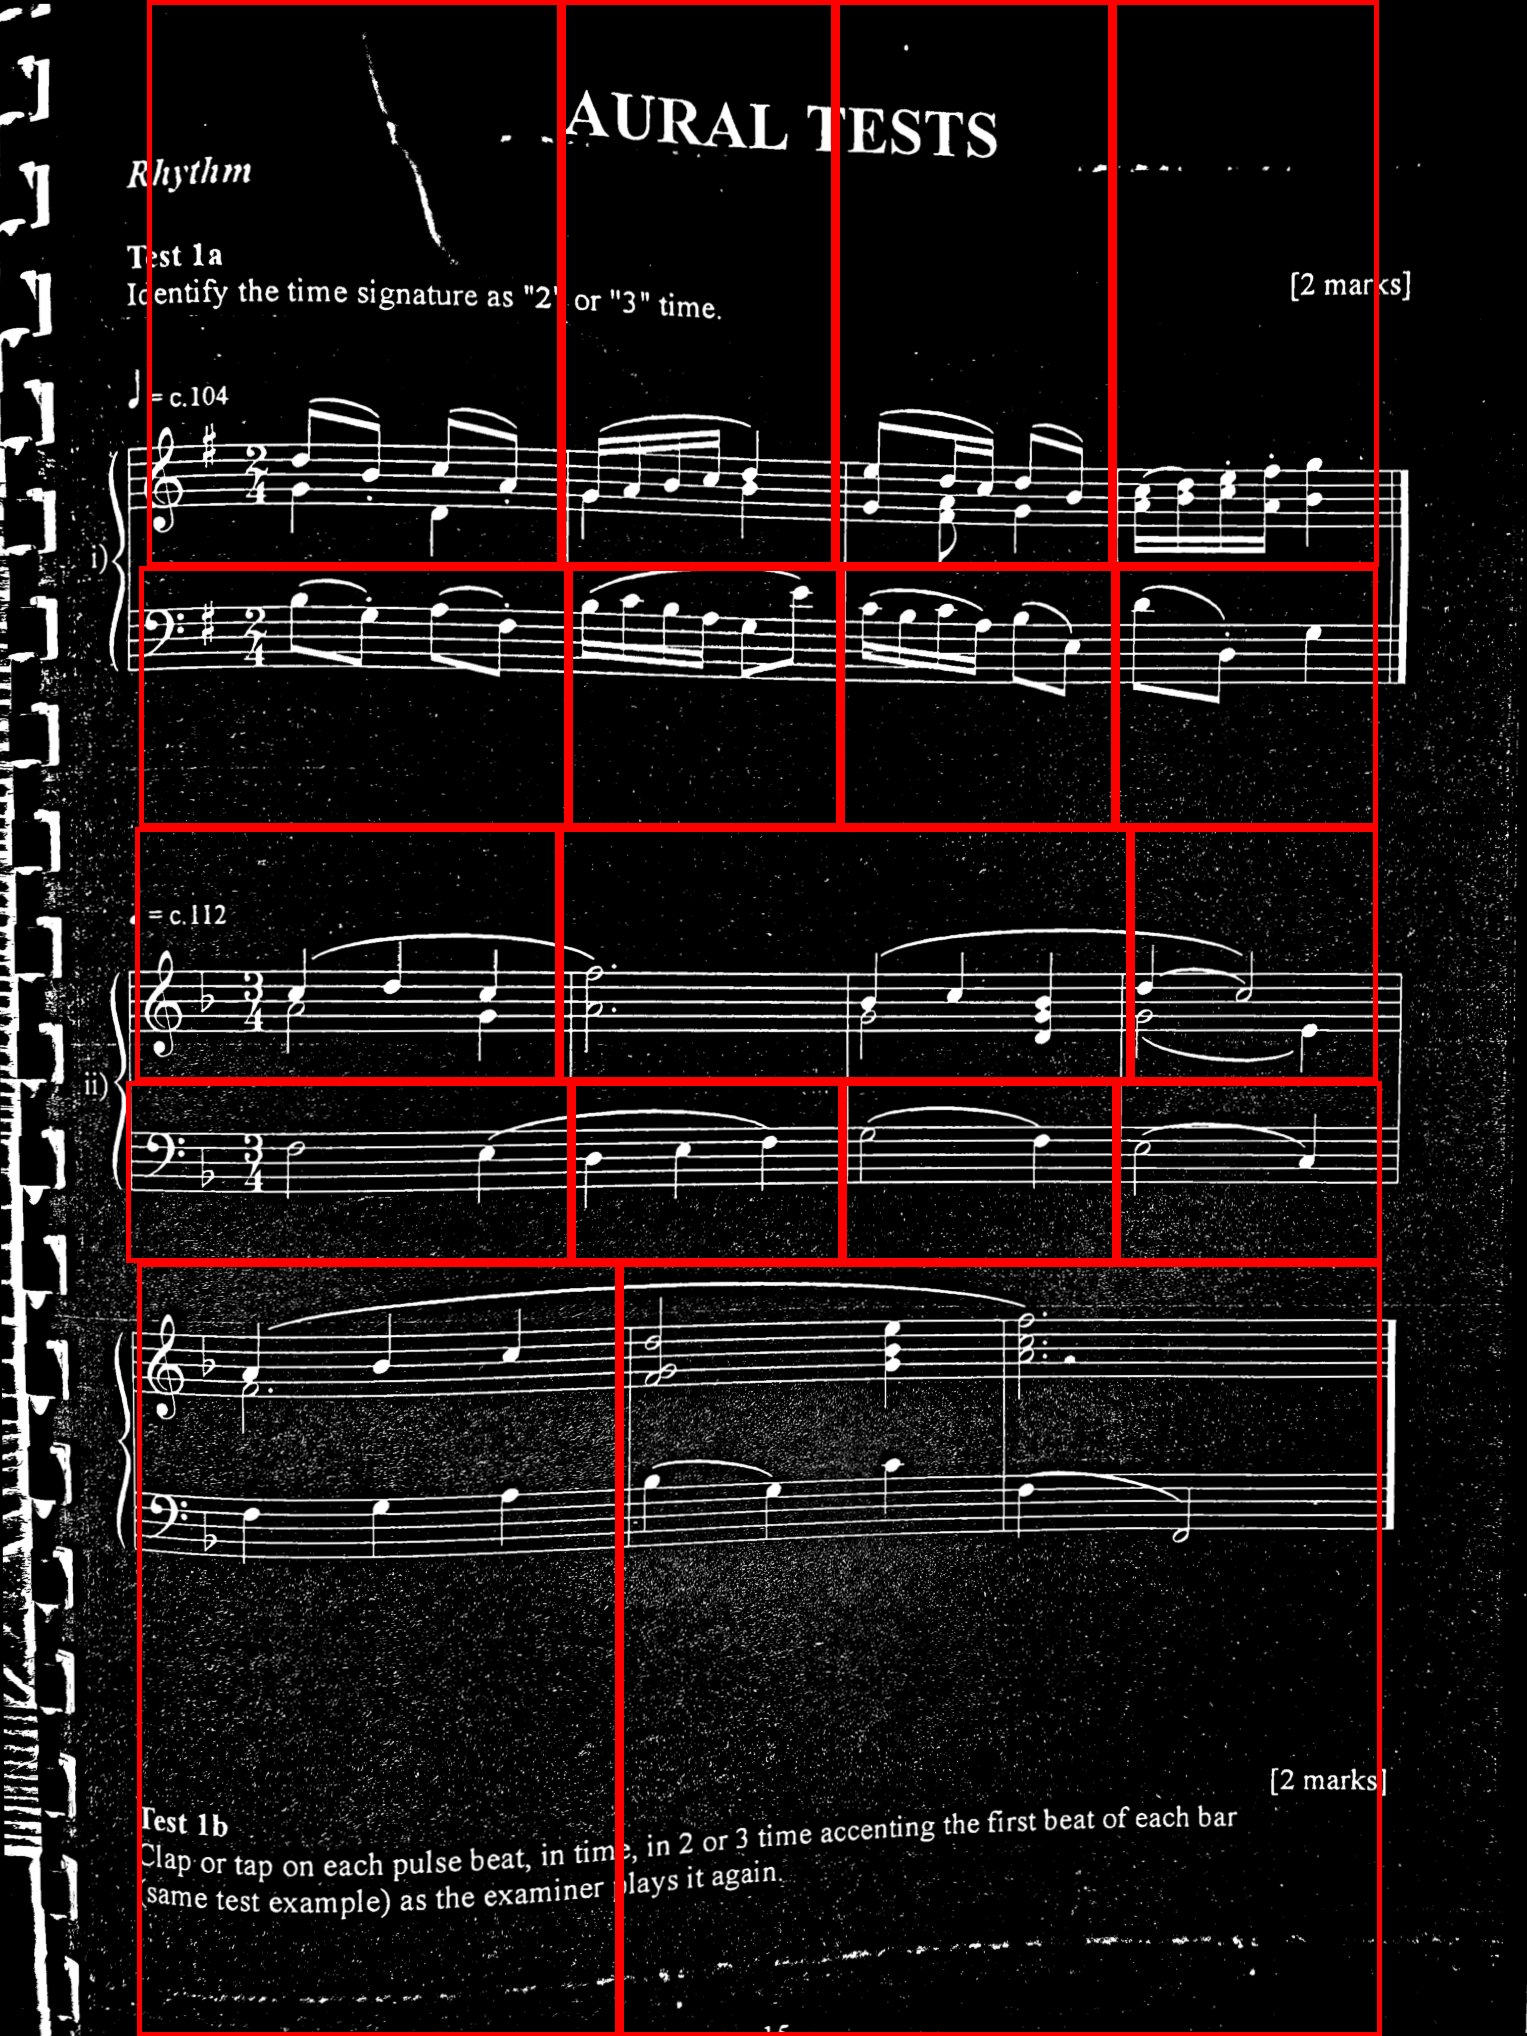

In [53]:
song = SystemObjects.SongFactory(sample_image, measure_dict, object_dict).song
boxes2 = []
for system in song.systems:
    for measure in system.measures:
        boxes2.append(measure.bbox())
visualize(sample_image, boxes2)

In [35]:
boxes2

[array([0.09692001, 0.        , 0.3677589 , 0.27812713], dtype=float32),
 array([0.3677589 , 0.        , 0.54690444, 0.27812713], dtype=float32),
 array([0.54690444, 0.        , 0.7287163 , 0.27812713], dtype=float32),
 array([0.7287163 , 0.        , 0.9026884 , 0.27812713], dtype=float32),
 array([0.09140024, 0.27812713, 0.37229842, 0.40623426], dtype=float32),
 array([0.37229842, 0.27812713, 0.55064374, 0.40623426], dtype=float32),
 array([0.55064374, 0.27812713, 0.73040855, 0.40623426], dtype=float32),
 array([0.73040855, 0.27812713, 0.90235233, 0.40623426], dtype=float32),
 array([0.08849289, 0.40623426, 0.55310124, 0.5312449 ], dtype=float32),
 array([0.55310124, 0.40623426, 0.9021014 , 0.5312449 ], dtype=float32),
 array([0.08276749, 0.5312449 , 0.37429038, 0.2833069 ], dtype=float32),
 array([0.37429038, 0.5312449 , 0.5514996 , 0.2833069 ], dtype=float32),
 array([0.5514996, 0.5312449, 0.7311548, 0.2833069], dtype=float32),
 array([0.7311548 , 0.5312449 , 0.90474665, 0.2833069 ]

### Launch MuseScore

In [11]:
song.toStream().show('musicxml')


KeyError: 19

In [ ]:
with open("bach_bw101_7.json", "w") as wb:
    wb.write(song.toJSON())